<a href="https://colab.research.google.com/github/markcastor/Mexico-Housing-Data-Analysis/blob/main/Mexico_Housing_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mexico Housing Data Analysis

In [1]:
import pandas as pd

Preparing Data

In [2]:
df1 = pd.read_csv("mexico-real-estate-1.csv",encoding="ISO-8859-1")
df2 = pd.read_csv("mexico-real-estate-2.csv",encoding="ISO-8859-1")
df3 = pd.read_csv("mexico-real-estate-3.csv",encoding="ISO-8859-1")

# Print object type and shape for DataFrames
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
print()
print("df2 type:", type(df2))
print("df2 shape:", df2.shape)
print()
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (700, 7)

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (700, 7)

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (700, 6)


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_usd      700 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 38.4+ KB


In [4]:
df1.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [5]:
df1.drop(columns = ["Unnamed: 0"], inplace = True)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_usd      700 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 32.9+ KB


Lets Clean df1 by dropping rows with NaN values. Then remove the "$" and "," characters from "price_usd" and recast the values in the column as floats.

In [7]:
#Remove 'NaN' values
df1.dropna(inplace=True)

#transform price fromobject to float
df1["price_usd"] = (
    df1["price_usd"]
    .str.replace("$", "", regex=False)
    .str.replace(",","")
    .astype(float)
    )

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    int64  
 5   price_usd      583 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 31.9+ KB


 First, drop rows with NaN values in df2. Next, use the "price_mxn" column to create a new column named "price_usd"

In [9]:
df2.drop(columns = ["Unnamed: 0"], inplace = True)

In [10]:
#Remove 'NaN' values
df2.dropna(inplace=True)

#Create a "price_usd" col
df2["price_usd"] = (df2["price_mxn"]/ 19).round(2)

#drop the mexican currency
df2.drop(columns=["price_mxn"], inplace=True)

df2.head()

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72,68421.05
2,house,Morelos,23.634501,-102.552788,360,278947.37
6,apartment,Estado de México,19.272040,-99.572013,85,65789.47
7,house,San Luis Potosí,22.138882,-100.996510,158,111578.95
8,apartment,Distrito Federal,19.394558,-99.129707,65,39904.74


##Clean df3

Drop rows with NaN values in df3. Then use the split method to create two new columns from "lat-lon" named "lat" and "lon", respectively.

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               700 non-null    int64  
 1   property_type            700 non-null    object 
 2   place_with_parent_names  700 non-null    object 
 3   lat-lon                  582 non-null    object 
 4   area_m2                  700 non-null    int64  
 5   price_usd                700 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 32.9+ KB


In [12]:
df3.drop(columns = ["Unnamed: 0"], inplace = True)

In [13]:
#Drop NAN rows
df3.dropna(inplace=True)

#split "lat-lon"
df3[["lat", "lon"]] = df3["lat-lon"].str.split(",", expand=True)

df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


Use the split method again, this time to extract the state for every house. (Note that the state name always appears after "México|" in each string.) Use this information to create a "state" column. Finally, drop the "place_with_parent_names" and "lat-lon" columns from the DataFrame.

In [14]:
#Create "state" col from "place_with_parent_names"
df3["state"] = df3["place_with_parent_names"].str.split("|", expand=True)[2]

#Drop cols
df3.drop(columns=["place_with_parent_names", "lat-lon"], inplace=True)

df3.head()

,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71,48550.59,19.52589,-99.151703,Distrito Federal
1,house,233,168636.73,19.2640539,-99.5727534,Estado de México
2,house,300,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175,102763.00,20.689157,-103.366728,Jalisco


##Concatenate DataFrames

Use pd.concat to concatenate df1, df2, df3 as new DataFrame named df. Your new DataFrame should have 1,736 rows and 6 columns:"property_type", "state", "lat", "lon", "area_m2", and "price_usd".

In [15]:
# Concatenate df1, df2, and df3
df = pd.concat([df1, df2, df3])
print(df.shape)
df.head()

(1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37



Save df as a CSV file using the to_csv method. The file path should be

In [16]:
df.to_csv("mexico-real-estate-clean.csv", index=False)

#Explanatory Data Analysis

import necessary Libraries

In [17]:
import matplotlib.pyplot as plt #visualizations
import pandas as pd # EDA
import plotly.express as px #visualizations

Import Data

In [18]:
df = pd.read_csv("mexico-real-estate-clean.csv")
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


##Location Data: "lat" and "lon"

Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map.

In [20]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13}, #Map will be centered on Mexico City
    width=600, #Width of map
    height=600, #Height of map
    hover_data=["price_usd"], #Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

##Categorical Data: "state"

In [21]:
df["state"].value_counts().head(10)

Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: state, dtype: int64

##Discriptive Statistics

Numerical Data: "area_m2" and "price_usd"


In [22]:
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


Lets Create a histogram of "area_m2". Make sure that the x-axis has the label "Area [sq meters]", the y-axis has the label "Frequency", and the plot has the title "Distribution of Home Sizes".

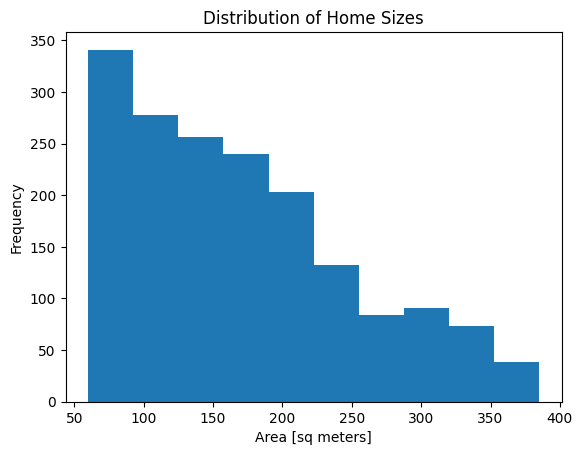

In [23]:
plt.hist(df['area_m2'])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");

Looking at our histogram, we can see that "area_m2" skews right.Meaning there are more houses at the lower end of the distribution (50–200m2) than at the higher end (250–400m2)

Now lets create a horizontal boxplot of "area_m2". Make sure that the x-axis has the label "Area [sq meters]" and the plot has the title "Distribution of Home Sizes".

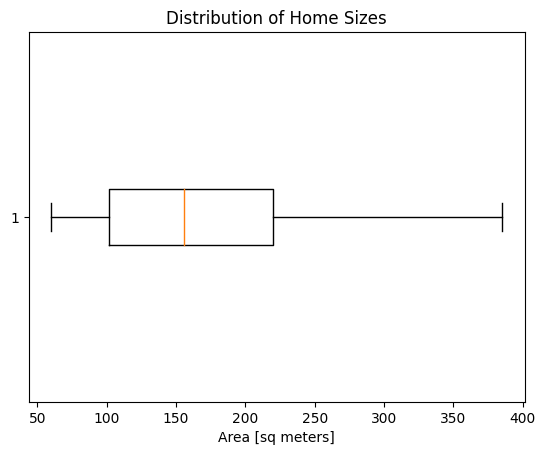

In [24]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes");

Lets create a histogram of "price_usd". Make sure that the x-axis has the label "Price [USD]", the y-axis has the label "Frequency", and the plot has the title "Distribution of Home Prices".

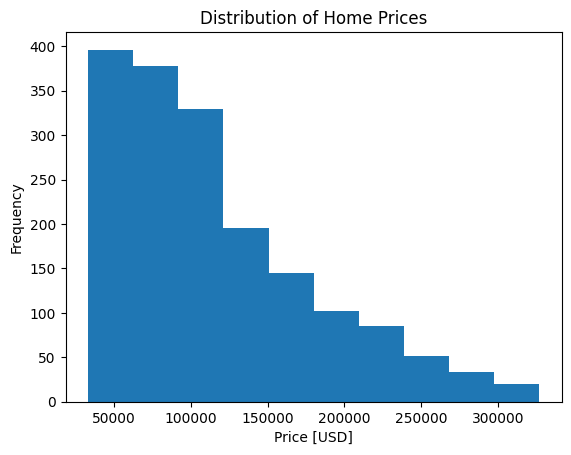

In [25]:
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

It looks like price_usd is definately more skewed than the area_m2

Text(0.5, 1.0, 'Distribution of Home Prices')

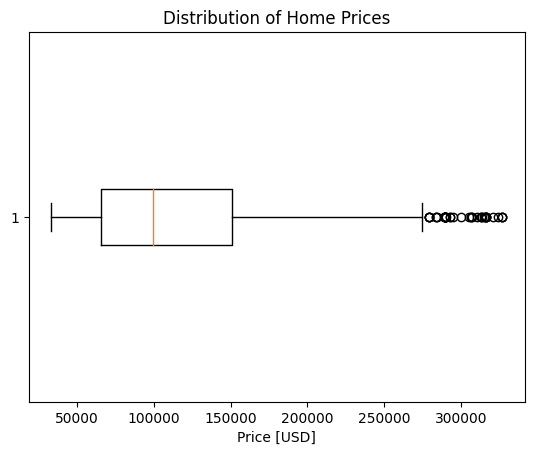

In [26]:
plt.boxplot(df["price_usd"], vert=False)
plt.xlabel("Price [USD]")
plt.title("Distribution of Home Prices")

The skew is so extreme in the place of this data that some house there prices are considered outliers

###Research Analysis

In [27]:
# Import "data/mexico-real-estate-clean.csv"
df =pd.read_csv("mexico-real-estate-clean.csv")

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


Which state has the most expensive real estate market?


Lets use the groupby method to create a Series named mean_price_by_state, where the index contains each state in the dataset and the values correspond to the mean house price for that state.

In [28]:
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

Lets visualize it using pandas

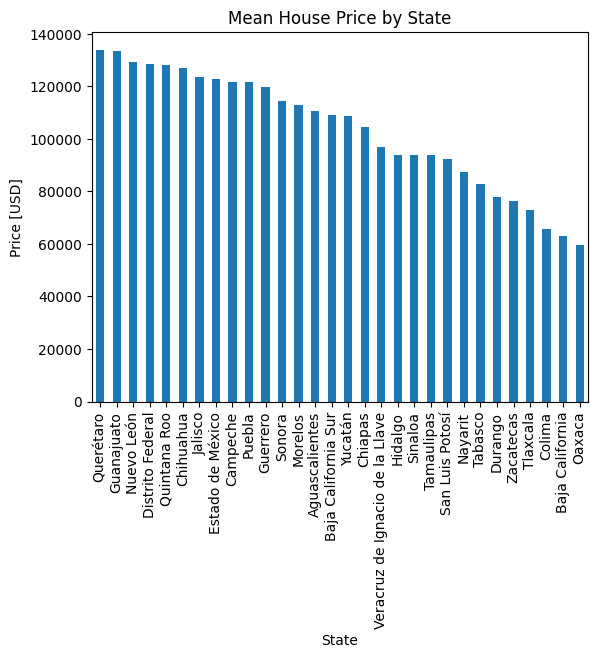

In [29]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Price [USD]",
    title="Mean House Price by State"
);


Lets Create a new column in df called "price_per_m2". This should be the price for each house divided by it's size.

In [30]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


Lets Make plot that acctualy matches our expectations

use the groupby method to create a Series where the index contains each state in the dataset and the values correspond to the mean house price per m2 for that state. Then use the Series to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as "State" and the y-axis as "Mean Price per M^2[USD]", and give the chart the title "Mean House Price per M^2 by State".

<Axes: title={'center': 'Mean House Price per M^2 by Sate'}, xlabel='State', ylabel='Mean Price per M^2[USD]'>

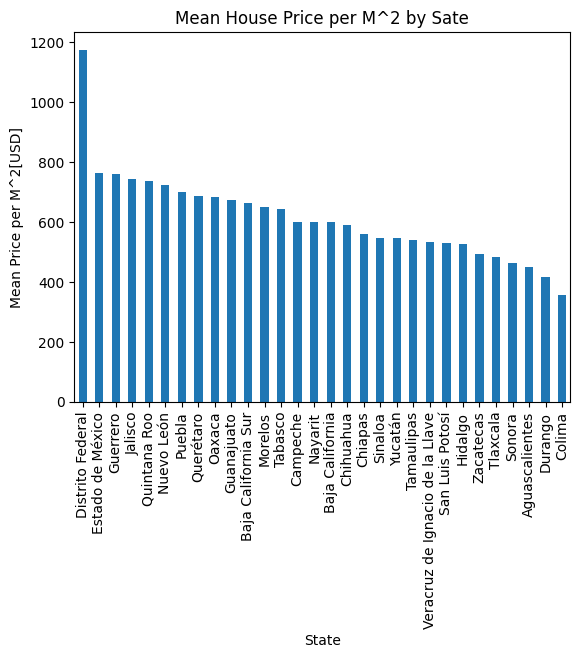

In [31]:
(
    #Lets create the series
    df
    .groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    #lets make the plot
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Mean Price per M^2[USD]",
        title="Mean House Price per M^2 by Sate"
    )
)

Now we see that the capital Mexico City (Distrito Federal) is by far the most expensive market. So it looks like this bar chart is a more accurate reflection of state real estate markets.

Lets see if there is a relationship between home size and price?

Create a scatter plot from `df` that represents price as a function of size.

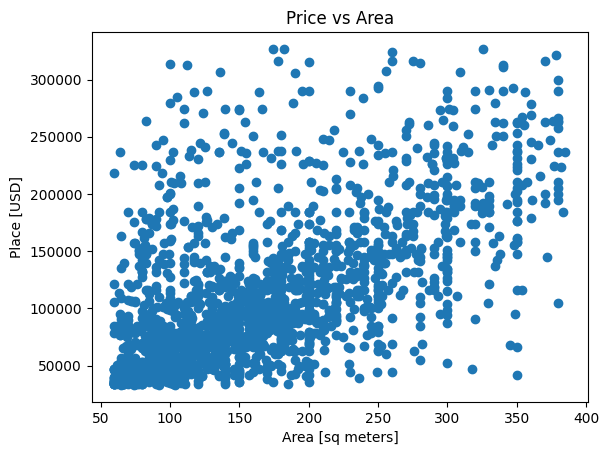

In [32]:
plt.scatter(x=df["area_m2"], y=df["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Place [USD]")
plt.title("Price vs Area");

According to the analysis we can see that the bigger the house, the higher the price

Lets Use the corr method, calculate the Pearson correlation coefficient for "area_m2" and "price_usd".

In [34]:
p_correlation = df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.585518245323206


Since the correlation coefficient is over 0.5 means there is a moderate relationship between house size an price in mexico.

Now lets create a new DataFrame named df_morelos. It should include all the houses from df that are in the state of Morelos.

In [37]:
df_morelos = df[df["state"] == "Morelos"]
df_morelos .head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


Using df_morelos, create a scatter plot that shows price vs area

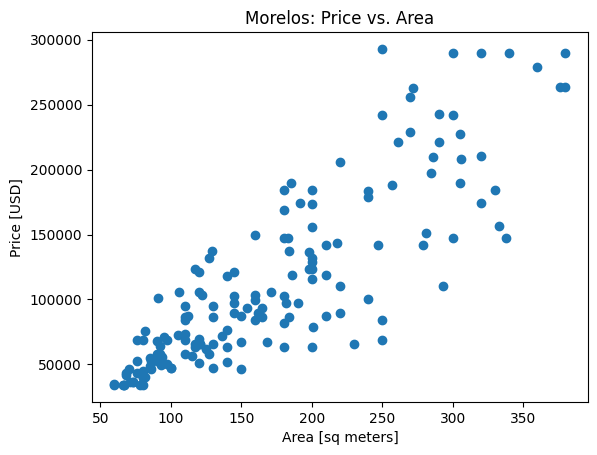

In [38]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Morelos: Price vs. Area");

It looks like the correlation is even stronger within Morelos. Now ,let's calculate the correlation coefficient and verify that that's the case.

In [39]:
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print(p_correlation)

0.8498077608713708


Now we can confirm that the correlation coefficient is high, hence we can conclude that there's a strong relationship between house size and price in Morelos.

Now lets Calculate the correlation coefficient for two Series using pandas.

0.41070392130717864


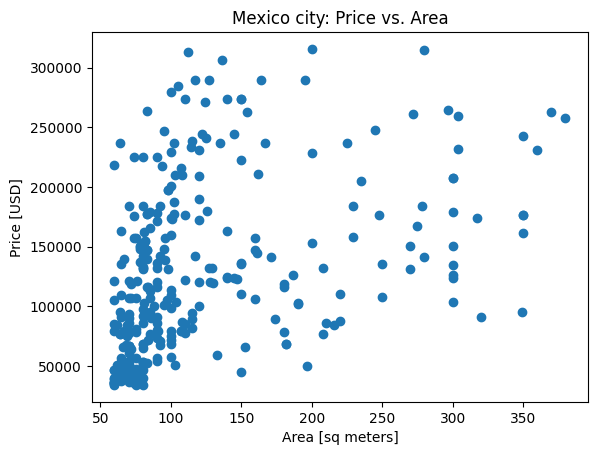

In [46]:
df_mexico_city = df[df["state"] == "Distrito Federal"]

#Create a scatter plotprice vs area
plt.scatter(x=df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Mexico city: Price vs. Area");

p_correlation= df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)

Here we can see that the size of a house doesnt have nearly a strong correlation with the Area

In [43]:
df_mexico_city.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
14,apartment,Distrito Federal,19.390748,-99.158695,127,131716.20,1037.135433
16,house,Distrito Federal,19.337652,-99.223327,297,264390.77,890.204613
20,apartment,Distrito Federal,19.403334,-99.157755,129,131716.20,1021.055814
21,apartment,Distrito Federal,19.428152,-99.106194,68,67175.26,987.871471
26,apartment,Distrito Federal,19.430141,-99.172536,97,104846.10,1080.887629
